# Easy OCR

1. Install and import dependencies:

In [21]:
!pip install easyocr
!pip install opencv-contrib
!pip install torch torchvision torchaudio
!pip install python-Levenshtein

ERROR: Could not find a version that satisfies the requirement opencv-contrib (from versions: none)
ERROR: No matching distribution found for opencv-contrib


In [25]:
import cv2,easyocr
import matplotlib.pyplot as plt
import numpy as np
import Levenshtein as lev

2. Read in images or videos

In [3]:
image_path = "/kaggle/input/ocr-bangla/OCR_Bangla/OCR Test/Clear Images/Test Images/1 (1).jpg"
reader = easyocr.Reader(['bn'], gpu=True)
result = reader.readtext(image_path)
print(result)

Progress: |██████████████████████████████████████████████████| 100.0% Complete[([[1243, 94], [1710, 94], [1710, 262], [1243, 262]], 'বাসা বাড়ীর', 0.7329072855121658), ([[1295, 244], [1820, 244], [1820, 401], [1295, 401]], 'পালটানো হয়', 0.7252509759556841), ([[3578, 277], [4062, 277], [4062, 415], [3578, 415]], 'বাসা ভাড়া', 0.9825405426831278), ([[545, 335], [945, 335], [945, 488], [545, 488]], 'বিক্রয় হইবে |', 0.9502312817482007), ([[1488, 369], [1897, 369], [1897, 474], [1488, 474]], 'প্রয়োজনে ড্রাইভার,(', 0.3599887240185711), ([[0, 429], [45, 429], [45, 507], [0, 507]], ')|', 0.564571301640911), ([[3947, 431], [4080, 431], [4080, 533], [3947, 533]], 'পরি', 0.9901456572024159), ([[331, 544], [612, 544], [612, 706], [331, 706]], 'চস্পরারমন ঃ ৭', 0.19361802099260422), ([[1301, 437], [2325, 437], [2325, 714], [1301, 714]], '01889-944691', 0.9999722630356905), ([[0, 653], [72, 653], [72, 732], [0, 732]], 'ঢম)', 0.5431779684316489), ([[3851, 654], [4080, 654], [4080, 719], [3851, 719]],

3. Draw Results

In [4]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
print(text)

বাসা বাড়ীর


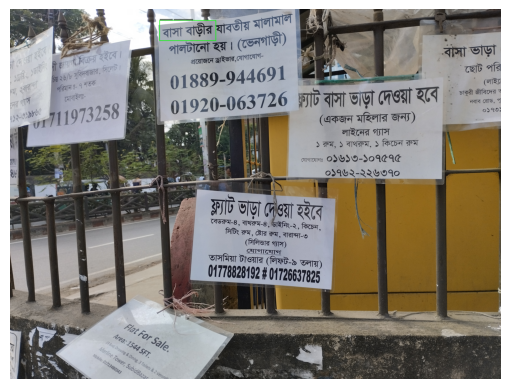

In [6]:
img = cv2.imread(image_path)


# Draw a rectangle
img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 3)

# Add text with the required arguments
font = cv2.FONT_HERSHEY_SIMPLEX  # Choose a font
font_scale = 0.5
thickness = 2
color = (0, 0, 0)  # Black text

img = cv2.putText(img, text, top_left, font, font_scale, color, thickness)

# Display the image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display in matplotlib
plt.axis('off')
plt.show()

4. Handline Multiple Lines

বাসা বাড়ীর
পালটানো হয়
বাসা ভাড়া
বিক্রয় হইবে |
প্রয়োজনে ড্রাইভার,(
)|
পরি
চস্পরারমন ঃ ৭
01889-944691
ঢম)
জীবিদের ত
নের গ্যাস
01920-063726  ঢ্যাট বাসা ভাড়া দেওয়া হবে
নবাব রোড, পূ
০১৭৩
(একজন মহিলার জন্য)
লাইনের গ্যাস
১ রুম, ১ বাথরুম,
১ কিচেন রুম
(9"
যোগাযোগঃ
০১৬১৩-১০৭৫৭৫
0|/
০১৭৬২-২২৬৩৭০
ফ্যাট ভাড়া দেওয়া হইবে
বেডরুম-৪ , বাথরুম-৪ , ডাইনিং-২ ,
রুম , ষ্টোর রুম , বারান্দা-৩
(সিলিন্ডার গ্যাস)
যোগাযোগ
তাসমিয়া
(লিফট-৯ তলায়)
01778828/92#01726637825
5?
৫০
$
9
$
মালামাল
যাবতীয়
(ভেনগাড়ী)
? হইবে [
,যোগাযোগ-
দেওয়া
জায়গ
১ডাইনিং
ছোট
সিলেট
সুবিদবাজার ,
১ড্রয়ি ,
২৬ ৮
(লাই
শতক
২বার্ান্দা
চাকুরী
মোবাইলঃ-
01711973258
]১২-৩ ৯৮৬৫
কিচেন
সিটিং
টাওয়ার
হ|৯`
হ|া
^গ২৯:
$|ঙ
1544 _
প["হ?
দহস/ ২
 $ণা.
ঐঠু]
ঢহহছ
স0কহস,
:01713480343
স%|২৫
স.য়ঠও=চহ 
;&2
$হ[হ৩


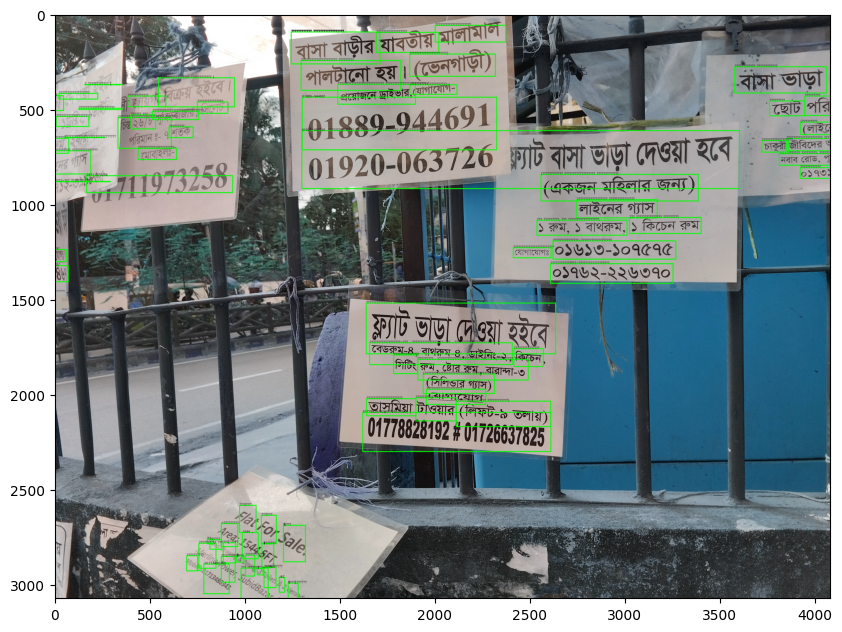

In [7]:
for detection in result:
    top_left = tuple([int(val) for val in detection[0][0]])
    bottom_right = tuple([int(val) for val in detection[0][2]])
    text = detection[1]
    print(text)
    font = cv2.FONT_HERSHEY_SIMPLEX
    img = cv2.rectangle(img, top_left, bottom_right, (0,255,0), 3)
    img = cv2.putText(img, text, top_left, font, 0.5, (0,0,0), 1, cv2.LINE_AA)
plt.figure(figsize=(10,20))
plt.imshow(img)
plt.show()

5. Text, Words, Characters

In [8]:
ground_truth_text = """এজন্নে, কাহারও ওরুপ বলা উচিত প্রিয় বা অশ্লিল কথা শুনিতে পায় না ।"""
result = """এজন্নে, কাহারও ওরুপ বলা উচিত প্রিয় বা অশ্লিল কথা শুনিতে পায় না ।"""

ground_truth_words = ground_truth_text.split()
recognized_words = result.split()

ground_truth_characters = [char for char in ground_truth_text if char.strip()]
recognized_characters = [char for char in result if char.split()]

print("Ground Truth Text: ", ground_truth_text, "\n"
      "Ground Truth Words: ", ground_truth_words, "\n"
      "Ground Truth Characters: ", ground_truth_characters,
     )

print("Recognized Text: ", result, "\n",
     "Recognized Words: ", recognized_words, "\n",
     "Recognized Characters: ", recognized_characters, )

Ground Truth Text:  এজন্নে, কাহারও ওরুপ বলা উচিত প্রিয় বা অশ্লিল কথা শুনিতে পায় না । 
Ground Truth Words:  ['এজন্নে,', 'কাহারও', 'ওরুপ', 'বলা', 'উচিত', 'প্রিয়', 'বা', 'অশ্লিল', 'কথা', 'শুনিতে', 'পায়', 'না', '।'] 
Ground Truth Characters:  ['এ', 'জ', 'ন', '্', 'ন', 'ে', ',', 'ক', 'া', 'হ', 'া', 'র', 'ও', 'ও', 'র', 'ু', 'প', 'ব', 'ল', 'া', 'উ', 'চ', 'ি', 'ত', 'প', '্', 'র', 'ি', 'য়', 'ব', 'া', 'অ', 'শ', '্', 'ল', 'ি', 'ল', 'ক', 'থ', 'া', 'শ', 'ু', 'ন', 'ি', 'ত', 'ে', 'প', 'া', 'য়', 'ন', 'া', '।']
Recognized Text:  এজন্নে, কাহারও ওরুপ বলা উচিত প্রিয় বা অশ্লিল কথা শুনিতে পায় না । 
 Recognized Words:  ['এজন্নে,', 'কাহারও', 'ওরুপ', 'বলা', 'উচিত', 'প্রিয়', 'বা', 'অশ্লিল', 'কথা', 'শুনিতে', 'পায়', 'না', '।'] 
 Recognized Characters:  ['এ', 'জ', 'ন', '্', 'ন', 'ে', ',', 'ক', 'া', 'হ', 'া', 'র', 'ও', 'ও', 'র', 'ু', 'প', 'ব', 'ল', 'া', 'উ', 'চ', 'ি', 'ত', 'প', '্', 'র', 'ি', 'য়', 'ব', 'া', 'অ', 'শ', '্', 'ল', 'ি', 'ল', 'ক', 'থ', 'া', 'শ', 'ু', 'ন', 'ি', 'ত', 'ে', 'প', 'া', 'য়', 'ন', 'া', '।']


6. Word Level Accuracy

In [9]:
# Calculate the number of correctly recognized words
correct_words = sum(1 for word in recognized_words if word in ground_truth_words)
word_accuracy = correct_words / len(ground_truth_words)
print('Word-level Accuracy: ', word_accuracy)

Word-level Accuracy:  1.0


7. Word Error Rate

In [10]:
# Method 1:
word_error_rate = lev.distance(recognized_words, ground_truth_words) / len(ground_truth_words)
print('Word Error Rate 1: ', word_error_rate)
# Method 2:
word_error_rate_ = 1 - word_accuracy
print("Word Error Rate 2: ", word_error_rate_)

Word Error Rate 1:  0.0
Word Error Rate 2:  0.0


8. Edit Distance

In [11]:
edit_distance = lev.distance(result, ground_truth_text)
print("Edit distance: ", edit_distance)

Edit distance:  0


9. Character Level Accuracy

In [12]:
correct_chars = sum(1 for pred_char, true_char in zip(recognized_characters, ground_truth_characters) if pred_char == true_char)
character_accuracy = correct_chars / len(ground_truth_characters)
print('Character Level Accuracy: ', character_accuracy)

Character Level Accuracy:  1.0


10. Character Error Rate

In [13]:
# Method 1:
total_errors = sum(1 for pred_char, true_char in zip(recognized_characters, ground_truth_characters) if pred_char != true_char)
total_characters = len(ground_truth_characters)
character_error_rate_1 = total_errors/total_characters
print("Character Error Rate 1: ", character_error_rate_1)

# Method 2:
character_error_rate_2 = 1 - character_accuracy
print("Character Error Rate 2: ", character_error_rate_2)

Character Error Rate 1:  0.0
Character Error Rate 2:  0.0


11. Precision, Recall, F1 Score

In [14]:
# Calculate the number of true positives (correctly recognized characters)
true_positives = sum(1 for pred_char, true_char in zip(recognized_characters, ground_truth_characters) if pred_char == true_char)

# Calculate the number of false positives (incorrectly recognized characters)
false_positives = len(recognized_characters) - true_positives

# Calculate precision
precision = true_positives / (true_positives + false_positives)

print("Precision:", precision)

# Calculate the number of false negatives (missed characters)
false_negatives = sum(1 for true_char in ground_truth_characters if true_char not in recognized_characters)

# Calculate recall
recall = true_positives / (true_positives + false_negatives)

print("Recall:", recall)


# Calculate the F1 score
f1_score = 2 * (precision * recall) / (precision + recall)

print("F1 Score:", f1_score)



Precision: 1.0
Recall: 1.0
F1 Score: 1.0


12. Define Important Metrics

In [26]:
def calculate_wer(ground_truth, ocr_output):
    # Create a list of words for the ground truth and OCR output
    ground_truth_words = ground_truth.split()
    ocr_words = ocr_output.split()
    
    # Initialize counters
    S = 0   # Number of substitutions
    D = 0   # Number of deletions
    I = 0   # Number of insertions
    N = len(ground_truth_words)  # Number of words in the ground truth
    
    # Alignment
    for i, word in enumerate(ground_truth_words):
        if i < len(ocr_words):
            if word != ocr_words[i]:
                S += 1
        else:
            D += 1
    if len(ocr_words) > N:
        I = len(ocr_words) - N
    # Calculate the Word Error Rate (WER)
    wer = (S + D + I) / N
    
    return wer

def calculate_word_accuracy(average_wer):
    return 1 - average_wer


# def calculate_cer(ocr_output, ground_truth):
#     import Levenshtein as lev
    
#     ocr_output = ocr_output.strip()
#     ground_truth = ground_truth.strip()
    
#     substitutions = lev.distance(ocr_output, ground_truth)
#     deletions = lev.distance(ocr_output, ground_truth)
#     insertions = lev.distance(ocr_output, ground_truth)
    
#     total_errors = substitutions + deletions + insertions
#     total_characters = len(ground_truth)
    
#     cer = total_errors / total_characters
    
#     return cer

def calculate_cer(ground_truth, ocr_output):
    # Preprocess text
    ground_truth = ground_truth
    ocr_output = ocr_output

    # Initialize counters
    S = 0  # Substitutions
    I = 0  # Insertions
    D = 0  # Deletions
    N_gt = len(ground_truth)  # Total number of characters in ground truth

    # Alignment
    for i in range(max(len(ground_truth), len(ocr_output))):
        if i < len(ground_truth) and i < len(ocr_output):
            if ground_truth[i] != ocr_output[i]:
                S += 1
        elif i < len(ground_truth):
            D += 1
        else:
            I += 1

    # Calculate CER
    CER = (S + I + D) / N_gt

    return CER

def calculate_character_accuracy(average_cer):
    return 1 - average_cer

def calculate_levenstein_distance(ground_truth, ocr_output):
    import Levenshtein as lev
    
    distance = lev.distance(ground_truth, ocr_output)
    
    return distance

def calculate_precision_recall_f1(ground_truth, ocr_output):
    TP = len(set(ground_truth) & set(ocr_output))
    FP = len(ocr_output) - TP
    FN = len(ground_truth) - TP
    
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return precision, recall, f1   

In [16]:
# Example 
ground_truth_text = "this is the ground truth text"
ocr_output_text = "this is the recognized text"

wer = calculate_wer(ground_truth_text, ocr_output_text)
print("Word Error Rate:", wer)
word_accuracy = calculate_word_accuracy(wer)
print("Word Accuracy:", word_accuracy)
cer = calculate_cer(ground_truth_text, ocr_output_text)
print("Character Error Rate:", cer)
character_accuracy = calculate_character_accuracy(cer)
print("Character Accuracy:", character_accuracy)
levenshtein_distance = calculate_levenstein_distance(ground_truth_text, ocr_output_text)
print("Levenshtein Distance:", levenshtein_distance)
precision, recall, f1 = calculate_precision_recall_f1(ground_truth_text, ocr_output_text)
print("Precision:", precision, "\n", 
      "Recall:", recall, "\n",
      "F1 Score:", f1)

Word Error Rate: 0.5
Word Accuracy: 0.5
Character Error Rate: 0.5862068965517241
Character Accuracy: 0.4137931034482759
Levenshtein Distance: 11
Precision: 0.4444444444444444 
 Recall: 0.41379310344827586 
 F1 Score: 0.4285714285714286


13. Multiple Images

In [27]:
import os
import easyocr

image_folder = "/kaggle/input/ocr-bangla/OCR_Bangla/OCR Test/Clear Images/Test Images"
reader = easyocr.Reader(['bn'], gpu=True)

for filename in os.listdir(image_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(image_folder, filename)
        result = reader.readtext(image_path)
        print(f"Results for {filename}:")
        for detection in result:
            print(detection[1])

Results for 1 (4).jpg:
4
^
চ
}
ণ0|
4৮;
8
ট
!
1
চ
>
ঠ
8
=
,
?
1
;
}
:

&
[
:

=


হ


[
;
গ
_
ঢ
;
Results for 1 (6).jpg:
এ
99
4
9
9
;ুঁ
প
এ্র
ঁঁ
ঢ 9
?
9্রঁ
9
তঁয়
@ঐ
ঐ
ঘ্
(

@্র@
ঐ 9্র
৩ড
!
&
4

?
!
?
@
দ্বিতীয় পত্র
@
একাদশ-দ্বাদশ শ্রেণি
9
9
ঐ
[*)
শ্রেণি
ঐ
ঐঁ
প্রথম
পত্র
একাদশ-দ্বাদশ
Results for 1 (13).jpg:
^৫|
33
^ও?0৫0ৈ
$হহঋ২
সি আই
ইনসেক্ট স্পরে
২৫০ মিলি:
ওজন:
১৫০ গ্রাম ৮
স
4য
যনরড
10
81
হ৫|
[৫ও৫ড
এরোসল
নিট
4[*1]
খরনের
কোর্য-১ন
748304419!>
4444
1161041143 
446408
Results for 1 (1).jpg:
বাসা বাড়ীর
পালটানো হয়
বাসা ভাড়া
বিক্রয় হইবে |
প্রয়োজনে ড্রাইভার,(
)|
পরি
চস্পরারমন ঃ ৭
01889-944691
ঢম)
জীবিদের ত
নের গ্যাস
01920-063726  ঢ্যাট বাসা ভাড়া দেওয়া হবে
নবাব রোড, পূ
০১৭৩
(একজন মহিলার জন্য)
লাইনের গ্যাস
১ রুম, ১ বাথরুম,
১ কিচেন রুম
(9"
যোগাযোগঃ
০১৬১৩-১০৭৫৭৫
0|/
০১৭৬২-২২৬৩৭০
ফ্যাট ভাড়া দেওয়া হইবে
বেডরুম-৪ , বাথরুম-৪ , ডাইনিং-২ ,
রুম , ষ্টোর রুম , বারান্দা-৩
(সিলিন্ডার গ্যাস)
যোগাযোগ
তাসমিয়া
(লিফট-৯ তলায়)
01778828/92#01726637825
5?
৫০
$
9
$
মালামাল
যাবতীয়
(ভেনগাড়ী)
? হইবে [
,যোগাযোগ-
দেওয়া


In [28]:
word_folder = "/kaggle/input/ocr-bangla/OCR_Bangla/OCR Test/Clear Images/Ground Truth Text"
word_files = os.listdir(word_folder)
for word_file in word_files:
    path = os.path.join(word_folder, word_file).replace("\\","/")
    print(path)
    with open(path, 'r', encoding='utf-8') as f:
        ground_truth = f.read()
        print(ground_truth)
        ground_truth_words = ground_truth.split()
        print(ground_truth_words)

/kaggle/input/ocr-bangla/OCR_Bangla/OCR Test/Clear Images/Ground Truth Text/1 (5).txt
মাম
ড্রিংকিং ওয়াটার
MUM drinking water conforms to Bangladesh Standards (BDS) and is enriched with natural minerals, well-balanced and ideal for people of all ages.
Hotline
01755520000-5
8019626866
Net Content
2 Liter b
প্রকৃত পরিমাণ
২ লিটার b
['মাম', 'ড্রিংকিং', 'ওয়াটার', 'MUM', 'drinking', 'water', 'conforms', 'to', 'Bangladesh', 'Standards', '(BDS)', 'and', 'is', 'enriched', 'with', 'natural', 'minerals,', 'well-balanced', 'and', 'ideal', 'for', 'people', 'of', 'all', 'ages.', 'Hotline', '01755520000-5', '8019626866', 'Net', 'Content', '2', 'Liter', 'b', 'প্রকৃত', 'পরিমাণ', '২', 'লিটার', 'b']
/kaggle/input/ocr-bangla/OCR_Bangla/OCR Test/Clear Images/Ground Truth Text/1 (23).txt
Idp | IELTS
Education & IELTS Roadshow
Grand Palace, 
Sylhet
5th May, 2024
10:30 AM-5:30AM 
স্কাউট ভবন 
স্টেডিয়াম গেইট (পূর্ব), সিলেট।
ক্যান্সার চিকিৎসার 

['Idp', '|', 'IELTS', 'Education', '&', 'IELTS', 'Roadshow', 'Grand'

In [23]:
!pip install jiwer

# Benchmarking Template

In [29]:
import re
from jiwer import wer, cer
import os
import cv2, easyocr
import matplotlib.pyplot as plt
import numpy as np
import Levenshtein as lev
import pandas as pd
import time

# Preprocessing function to remove line breaks and normalize spaces
def preprocess_text(text):
    # Remove line breaks and normalize spaces
    return re.sub(r'\s+', ' ', text).strip()

# Function to calculate Levenshtein distance
def calculate_levenstein_distance(text1, text2):
    return lev.distance(text1, text2)

# Function to calculate Precision, Recall, and F1 Score
def calculate_precision_recall_f1(ground_truth, detected_text):
    gt_chars = list(ground_truth)
    dt_chars = list(detected_text)
    
    true_positive = sum(1 for char in gt_chars if char in dt_chars)
    false_positive = len(dt_chars) - true_positive
    false_negative = len(gt_chars) - true_positive
    
    precision = true_positive / (true_positive + false_positive) if true_positive + false_positive > 0 else 0
    recall = true_positive / (true_positive + false_negative) if true_positive + false_negative > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0
    
    return precision, recall, f1

reader = easyocr.Reader(['bn'], gpu=True)

image_folder = ""  # Add the path to your image folder
word_folder = ""   # Add the path to your ground truth folder
# Get a list of image files
image_files = sorted(os.listdir(image_folder))
print(image_files)
# Assuming the image filenames correspond to ground truth filenames
word_files = sorted(os.listdir(word_folder))
print(word_files)

# Initialize metrics and DataFrame
data = []

total_wer = 0
total_cer = 0
total_levenstein_distance = 0
total_precision, total_recall, total_f1 = 0, 0, 0
total_inference_time = 0
total_images = len(image_files)

for image_file, word_file in zip(image_files, word_files):
    # Perform OCR on the image and measure inference time
    start_time = time.time()
    ocr_output = reader.readtext(os.path.join(image_folder, image_file))
    inference_time = time.time() - start_time
    total_inference_time += inference_time
    ocr_output = '\n'.join([detection[1] for detection in ocr_output])
    print(f'OCR Output: {ocr_output}')

    # Read ground truth text
    with open(os.path.join(word_folder, word_file).replace("\\", "/"), 'r', encoding='utf-8') as f:
        ground_truth_words = f.read()
        print(f'Ground Truth Words: {ground_truth_words}')
    
    GTT_processed = preprocess_text(ground_truth_words)
    DT_processed = preprocess_text(ocr_output)
    
    # Calculate WER
    wer_value = wer(GTT_processed, DT_processed)
    print(f'WER: {wer_value}')
    total_wer += wer_value
    
    # Calculate CER
    cer_value = cer(GTT_processed, DT_processed)
    print(f'CER: {cer_value}')
    total_cer += cer_value
    
    # Calculate Levenshtein distance
    levenshtein_distance = calculate_levenstein_distance(GTT_processed, DT_processed)
    print(f'Levenshtein Distance: {levenshtein_distance}')
    total_levenstein_distance += levenshtein_distance
    
    # Calculate precision, recall, and F1 score
    precision, recall, f1 = calculate_precision_recall_f1(GTT_processed, DT_processed)
    print(f'Precision: {precision}, Recall: {recall}, F1 Score: {f1}')
    total_precision += precision
    total_recall += recall
    total_f1 += f1 
    
    print(f"Image: {image_file}, Word: {word_file}, WER: {wer_value}, CER: {cer_value}, Levenshtein Distance: {levenshtein_distance}")
    
    # Store results in the DataFrame
    data.append({
        "Image File": image_file,
        "Word File": word_file,
        "WER": wer_value,
        "CER": cer_value,
        "Word Accuracy": 1 - wer_value,
        "Character Accuracy": 1 - cer_value,
        "Levenshtein Distance": levenshtein_distance,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Inference Time (s)": inference_time,
    })

# Create the DataFrame
df = pd.DataFrame(data)
print(df)

## Performance Evaluation:
# Calculate average WER
average_wer = total_wer / total_images
print(f"Average Word Error Rate: {average_wer}")
# Calculate average CER
average_cer = total_cer / total_images
print(f"Average Character Error Rate: {average_cer}")
# Levenshtein distance
average_levenstein_distance = total_levenstein_distance / total_images
print(f"Average Levenshtein Distance: {average_levenstein_distance}")
# Precision, recall, and F1 score
average_precision = total_precision / total_images
print(f"Average Precision: {average_precision}")
average_recall = total_recall / total_images
print(f"Average Recall: {average_recall}")
average_f1 = total_f1 / total_images
print(f"Average F1 Score: {average_f1}")

avg_data = []
avg_data.append({
    "Average WER": average_wer,
    "Average CER": average_cer,
    "Average Levenshtein Distance": average_levenstein_distance,
    "Average Precision": average_precision,
    "Average Recall": average_recall,
    "Average F1": average_f1,
})

summary_df = pd.DataFrame(avg_data)
print(summary_df)


FileNotFoundError: [Errno 2] No such file or directory: ''

The next step is to measure the performance of the OCR Engine on 
* Documents
* Crisp Images
* Blurred Images
* Torn Images
* Tilted Images

# Documents

In [30]:
def calculate_wer(ground_truth, ocr_output):
    # Create a list of words for the ground truth and OCR output
    ground_truth_words = ground_truth.split()
    ocr_words = ocr_output.split()
    
    # Initialize counters
    S = 0   # Number of substitutions
    D = 0   # Number of deletions
    I = 0   # Number of insertions
    N = len(ground_truth_words)  # Number of words in the ground truth
    
    # Alignment
    for i, word in enumerate(ground_truth_words):
        if i < len(ocr_words):
            if word != ocr_words[i]:
                S += 1
        else:
            D += 1
    if len(ocr_words) > N:
        I = len(ocr_words) - N
    # Calculate the Word Error Rate (WER)
    wer = (S + D + I) / N
    
    return wer

def calculate_word_accuracy(average_wer):
    return 1 - average_wer


# def calculate_cer(ocr_output, ground_truth):
#     import Levenshtein as lev
    
#     ocr_output = ocr_output.strip()
#     ground_truth = ground_truth.strip()
    
#     substitutions = lev.distance(ocr_output, ground_truth)
#     deletions = lev.distance(ocr_output, ground_truth)
#     insertions = lev.distance(ocr_output, ground_truth)
    
#     total_errors = substitutions + deletions + insertions
#     total_characters = len(ground_truth)
    
#     cer = total_errors / total_characters
    
#     return cer

def calculate_cer(ground_truth, ocr_output):
    # Preprocess text
    ground_truth = ground_truth
    ocr_output = ocr_output

    # Initialize counters
    S = 0  # Substitutions
    I = 0  # Insertions
    D = 0  # Deletions
    N_gt = len(ground_truth)  # Total number of characters in ground truth

    # Alignment
    for i in range(max(len(ground_truth), len(ocr_output))):
        if i < len(ground_truth) and i < len(ocr_output):
            if ground_truth[i] != ocr_output[i]:
                S += 1
        elif i < len(ground_truth):
            D += 1
        else:
            I += 1

    # Calculate CER
    CER = (S + I + D) / N_gt

    return CER

def calculate_character_accuracy(average_cer):
    return 1 - average_cer

def calculate_levenstein_distance(ground_truth, ocr_output):
    import Levenshtein as lev
    
    distance = lev.distance(ground_truth, ocr_output)
    
    return distance

def calculate_precision_recall_f1(ground_truth, ocr_output):
    TP = len(set(ground_truth) & set(ocr_output))
    FP = len(ocr_output) - TP
    FN = len(ground_truth) - TP
    
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return precision, recall, f1   

In [31]:
!pip install jiwer
!pip install easyocr
!pip install opencv-contrib
!pip install torch torchvision torchaudio
!pip install python-Levenshtein

ERROR: Could not find a version that satisfies the requirement opencv-contrib (from versions: none)
ERROR: No matching distribution found for opencv-contrib


In [69]:
import re
from jiwer import wer, cer
import os
import cv2, easyocr
import matplotlib.pyplot as plt
import numpy as np
import Levenshtein as lev
import pandas as pd
import time

# Preprocessing function to remove line breaks and normalize spaces
def preprocess_text(text):
    # Remove line breaks and normalize spaces
    return re.sub(r'\s+', ' ', text).strip()

# Function to calculate Levenshtein distance
def calculate_levenstein_distance(text1, text2):
    return lev.distance(text1, text2)


def calculate_precision_recall_f1(ground_truth, detected_text):
    # Convert ground truth and detected text to sets of characters
    gt_chars = set(ground_truth)
    dt_chars = set(detected_text)
    
    # Calculate True Positives, False Positives, and False Negatives
    true_positive = len(gt_chars.intersection(dt_chars))
    false_positive = len(dt_chars - gt_chars)
    false_negative = len(gt_chars - dt_chars)
    
    # Calculate Precision, Recall, and F1 Score
    precision = true_positive / (true_positive + false_positive) if true_positive + false_positive > 0 else 0
    recall = true_positive / (true_positive + false_negative) if true_positive + false_negative > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0
    
    return precision, recall, f1


reader = easyocr.Reader(['bn'], gpu=True)

image_folder = "/kaggle/input/ocr-bangla/OCR_Bangla/OCR Test/Document Images/Test Images"  # Add the path to your image folder
word_folder = "/kaggle/input/ocr-bangla/OCR_Bangla/OCR Test/Document Images/Ground Truth Text"   # Add the path to your ground truth folder
# Get a list of image files
image_files = sorted(os.listdir(image_folder))
print(image_files)
# Assuming the image filenames correspond to ground truth filenames
word_files = sorted(os.listdir(word_folder))
print(word_files)

# Initialize metrics and DataFrame
data = []

total_wer = 0
total_cer = 0
total_levenstein_distance = 0
total_precision, total_recall, total_f1 = 0, 0, 0
total_inference_time = 0
total_images = len(image_files)

for image_file, word_file in zip(image_files, word_files):
    # Perform OCR on the image and measure inference time
    start_time = time.time()
    ocr_output = reader.readtext(os.path.join(image_folder, image_file))
    inference_time = time.time() - start_time
    total_inference_time += inference_time
    ocr_output = '\n'.join([detection[1] for detection in ocr_output])
    print(f'OCR Output: {ocr_output}')

    # Read ground truth text
    with open(os.path.join(word_folder, word_file).replace("\\", "/"), 'r', encoding='utf-8') as f:
        ground_truth_words = f.read()
        print(f'Ground Truth Words: {ground_truth_words}')
    
    GTT_processed = preprocess_text(ground_truth_words)
    DT_processed = preprocess_text(ocr_output)
    
    # Calculate WER
    wer_value = wer(GTT_processed, DT_processed)
    print(f'WER: {wer_value}')
    total_wer += wer_value
    
    # Calculate CER
    cer_value = cer(GTT_processed, DT_processed)
    print(f'CER: {cer_value}')
    total_cer += cer_value
    
    # Calculate Levenshtein distance
    levenshtein_distance = calculate_levenstein_distance(GTT_processed, DT_processed)
    print(f'Levenshtein Distance: {levenshtein_distance}')
    total_levenstein_distance += levenshtein_distance
    
    # Calculate precision, recall, and F1 score
    precision, recall, f1 = calculate_precision_recall_f1(GTT_processed, DT_processed)
    print(f'Precision: {precision}, Recall: {recall}, F1 Score: {f1}')
    total_precision += precision
    total_recall += recall
    total_f1 += f1 
    
    print(f"Image: {image_file}, Word: {word_file}, WER: {wer_value}, CER: {cer_value}, Levenshtein Distance: {levenshtein_distance}")
    
    # Store results in the DataFrame
    data.append({
        "Image File": image_file,
        "Word File": word_file,
        "WER": wer_value,
        "CER": cer_value,
        "Word Accuracy": 1 - wer_value,
        "Character Accuracy": 1 - cer_value,
        "Levenshtein Distance": levenshtein_distance,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Inference Time (s)": inference_time,
    })

# Create the DataFrame
df = pd.DataFrame(data)
print(df)

## Performance Evaluation:
# Calculate average WER
average_wer = total_wer / total_images
print(f"Average Word Error Rate: {average_wer}")
# Calculate average CER
average_cer = total_cer / total_images
print(f"Average Character Error Rate: {average_cer}")
# Levenshtein distance
average_levenstein_distance = total_levenstein_distance / total_images
print(f"Average Levenshtein Distance: {average_levenstein_distance}")
# Precision, recall, and F1 score
average_precision = total_precision / total_images
print(f"Average Precision: {average_precision}")
average_recall = total_recall / total_images
print(f"Average Recall: {average_recall}")
average_f1 = total_f1 / total_images
print(f"Average F1 Score: {average_f1}")

avg_data = []
avg_data.append({
    "Average WER": average_wer,
    "Average CER": average_cer,
    "Average Levenshtein Distance": average_levenstein_distance,
    "Average Precision": average_precision,
    "Average Recall": average_recall,
    "Average F1": average_f1,
})

summary_df = pd.DataFrame(avg_data)
print(summary_df)


['1 (1).jpg', '1 (10).jpg', '1 (11).jpg', '1 (12).jpg', '1 (13).jpg', '1 (14).jpg', '1 (2).jpg', '1 (3).jpg', '1 (4).jpg', '1 (5).jpg', '1 (6).jpg', '1 (7).jpg', '1 (8).jpg', '1 (9).jpg', 'Adar_Kora_Alo_Page161_to_Page176_Page_01.jpg', 'Adar_Kora_Alo_Page161_to_Page176_Page_02.jpg', 'Adar_Kora_Alo_Page161_to_Page176_Page_03.jpg', 'Aguner_Chamak_Page07_to_Page29_Page_01.jpg', 'Aguner_Chamak_Page07_to_Page29_Page_02.jpg', 'Aguner_Chamak_Page07_to_Page29_Page_03.jpg']
['1 (1).txt', '1 (10).txt', '1 (11).txt', '1 (12).txt', '1 (13).txt', '1 (14).txt', '1 (2).txt', '1 (3).txt', '1 (4).txt', '1 (5).txt', '1 (6).txt', '1 (7).txt', '1 (8).txt', '1 (9).txt', 'Adar_Kora_Alo_Page161_to_Page176_Page_01.txt', 'Adar_Kora_Alo_Page161_to_Page176_Page_02.txt', 'Adar_Kora_Alo_Page161_to_Page176_Page_03.txt', 'Aguner_Chamak_Page07_to_Page29_Page_01.txt', 'Aguner_Chamak_Page07_to_Page29_Page_02.txt', 'Aguner_Chamak_Page07_to_Page29_Page_03.txt']
OCR Output: নিজেদের অপকর্মের মাশুল
গুণতে
হব
এবং কেয়ামতের ময়দ

In [70]:
df_documents = df
df_documents

,Image File,Word File,WER,CER,Word Accuracy,Character Accuracy,Levenshtein Distance,Precision,Recall,F1 Score,Inference Time (s)
0,1 (1).jpg,1 (1).txt,0.403846,0.151515,0.596154,0.848485,50,0.956522,0.916667,0.936170,1.536030
1,1 (10).jpg,1 (10).txt,0.250923,0.120924,0.749077,0.879076,178,0.927536,0.955224,0.941176,4.113914
2,1 (11).jpg,1 (11).txt,0.259542,0.090216,0.740458,0.909784,71,0.941176,0.905660,0.923077,2.890943
3,1 (12).jpg,1 (12).txt,0.198830,0.060158,0.801170,0.939842,122,0.942029,0.942029,0.942029,5.505491
4,1 (13).jpg,1 (13).txt,0.206573,0.074413,0.793427,0.925587,171,0.898551,0.968750,0.932331,6.618469
5,1 (14).jpg,1 (14).txt,0.236111,0.086146,0.763889,0.913854,171,0.876712,0.941176,0.907801,5.618306
6,1 (2).jpg,1 (2).txt,0.326531,0.109783,0.673469,0.890217,202,0.851351,0.926471,0.887324,5.233635
7,1 (3).jpg,1 (3).txt,0.270588,0.096246,0.729412,0.903754,200,0.926471,0.969231,0.947368,5.499561
8,1 (4).jpg,1 (4).txt,0.257669,0.081505,0.742331,0.918495,78,0.946429,0.981481,0.963636,2.752737
9,1 (5).jpg,1 (5).txt,0.211039,0.080899,0.788961,0.919101,144,0.937500,0.967742,0.952381,4.975884


In [41]:
df_documents.to_csv("EasyOCR_BanglaCrossHair_Documents.csv")

In [71]:
df_documents_summary = summary_df
summary_df

,Average WER,Average CER,Average Levenshtein Distance,Average Precision,Average Recall,Average F1
0,0.295188,0.131601,187.65,0.914321,0.937999,0.925559


In [72]:
summary_df.to_csv("Summary_EasyOCR_BanglaCrossHair_Documents.csv")

# Clear Images

In [42]:
!pip install jiwer
!pip install easyocr
!pip install opencv-contrib
!pip install torch torchvision torchaudio
!pip install python-Levenshtein

ERROR: Could not find a version that satisfies the requirement opencv-contrib (from versions: none)
ERROR: No matching distribution found for opencv-contrib


In [64]:
import re
from jiwer import wer, cer
import os
import cv2, easyocr
import matplotlib.pyplot as plt
import numpy as np
import Levenshtein as lev
import pandas as pd
import time

# Preprocessing function to remove line breaks and normalize spaces
def preprocess_text(text):
    # Remove line breaks and normalize spaces
    return re.sub(r'\s+', ' ', text).strip()

# Function to calculate Levenshtein distance
def calculate_levenstein_distance(text1, text2):
    return lev.distance(text1, text2)


def calculate_precision_recall_f1(ground_truth, detected_text):
    # Convert ground truth and detected text to sets of characters
    gt_chars = set(ground_truth)
    dt_chars = set(detected_text)
    
    # Calculate True Positives, False Positives, and False Negatives
    true_positive = len(gt_chars.intersection(dt_chars))
    false_positive = len(dt_chars - gt_chars)
    false_negative = len(gt_chars - dt_chars)
    
    # Calculate Precision, Recall, and F1 Score
    precision = true_positive / (true_positive + false_positive) if true_positive + false_positive > 0 else 0
    recall = true_positive / (true_positive + false_negative) if true_positive + false_negative > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0
    
    return precision, recall, f1


reader = easyocr.Reader(['bn'], gpu=True)

image_folder = "/kaggle/input/ocr-bangla/OCR_Bangla/OCR Test/Clear Images/Test Images"  # Add the path to your image folder
word_folder = "/kaggle/input/ocr-bangla/OCR_Bangla/OCR Test/Clear Images/Ground Truth Text"   # Add the path to your ground truth folder
# Get a list of image files
image_files = sorted(os.listdir(image_folder))
print(image_files)
# Assuming the image filenames correspond to ground truth filenames
word_files = sorted(os.listdir(word_folder))
print(word_files)

# Initialize metrics and DataFrame
data = []

total_wer = 0
total_cer = 0
total_levenstein_distance = 0
total_precision, total_recall, total_f1 = 0, 0, 0
total_inference_time = 0
total_images = len(image_files)

for image_file, word_file in zip(image_files, word_files):
    # Perform OCR on the image and measure inference time
    start_time = time.time()
    ocr_output = reader.readtext(os.path.join(image_folder, image_file))
    inference_time = time.time() - start_time
    total_inference_time += inference_time
    ocr_output = '\n'.join([detection[1] for detection in ocr_output])
    print(f'OCR Output: {ocr_output}')

    # Read ground truth text
    with open(os.path.join(word_folder, word_file).replace("\\", "/"), 'r', encoding='utf-8') as f:
        ground_truth_words = f.read()
        print(f'Ground Truth Words: {ground_truth_words}')
    
    GTT_processed = preprocess_text(ground_truth_words)
    DT_processed = preprocess_text(ocr_output)
    
    # Calculate WER
    wer_value = wer(GTT_processed, DT_processed)
    print(f'WER: {wer_value}')
    total_wer += wer_value
    
    # Calculate CER
    cer_value = cer(GTT_processed, DT_processed)
    print(f'CER: {cer_value}')
    total_cer += cer_value
    
    # Calculate Levenshtein distance
    levenshtein_distance = calculate_levenstein_distance(GTT_processed, DT_processed)
    print(f'Levenshtein Distance: {levenshtein_distance}')
    total_levenstein_distance += levenshtein_distance
    
    # Calculate precision, recall, and F1 score
    precision, recall, f1 = calculate_precision_recall_f1(GTT_processed, DT_processed)
    print(f'Precision: {precision}, Recall: {recall}, F1 Score: {f1}')
    total_precision += precision
    total_recall += recall
    total_f1 += f1 
    
    print(f"Image: {image_file}, Word: {word_file}, WER: {wer_value}, CER: {cer_value}, Levenshtein Distance: {levenshtein_distance}")
    
    # Store results in the DataFrame
    data.append({
        "Image File": image_file,
        "Word File": word_file,
        "WER": wer_value,
        "CER": cer_value,
        "Word Accuracy": 1 - wer_value,
        "Character Accuracy": 1 - cer_value,
        "Levenshtein Distance": levenshtein_distance,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Inference Time (s)": inference_time,
    })

# Create the DataFrame
df_clear_images = pd.DataFrame(data)
print(df_clear_images)

## Performance Evaluation:
# Calculate average WER
average_wer = total_wer / total_images
print(f"Average Word Error Rate: {average_wer}")
# Calculate average CER
average_cer = total_cer / total_images
print(f"Average Character Error Rate: {average_cer}")
# Levenshtein distance
average_levenstein_distance = total_levenstein_distance / total_images
print(f"Average Levenshtein Distance: {average_levenstein_distance}")
# Precision, recall, and F1 score
average_precision = total_precision / total_images
print(f"Average Precision: {average_precision}")
average_recall = total_recall / total_images
print(f"Average Recall: {average_recall}")
average_f1 = total_f1 / total_images
print(f"Average F1 Score: {average_f1}")

avg_data = []
avg_data.append({
    "Average WER": average_wer,
    "Average CER": average_cer,
    "Average Levenshtein Distance": average_levenstein_distance,
    "Average Precision": average_precision,
    "Average Recall": average_recall,
    "Average F1": average_f1,
})

summary_df_clear_images = pd.DataFrame(avg_data)
print(summary_df_clear_images)

['1 (1).jpg', '1 (10).jpg', '1 (11).jpg', '1 (12).jpg', '1 (13).jpg', '1 (14).jpg', '1 (15).jpg', '1 (16).jpg', '1 (17).jpg', '1 (2).jpg', '1 (21).jpg', '1 (22).jpg', '1 (23).jpg', '1 (3).jpg', '1 (4).jpg', '1 (5).jpg', '1 (6).jpg', '1 (7).jpg', '1 (8).jpg', '1 (9).jpg']
['1 (1).txt', '1 (10).txt', '1 (11).txt', '1 (12).txt', '1 (13).txt', '1 (14).txt', '1 (15).txt', '1 (16).txt', '1 (17).txt', '1 (2).txt', '1 (21).txt', '1 (22).txt', '1 (23).txt', '1 (3).txt', '1 (4).txt', '1 (5).txt', '1 (6).txt', '1 (7).txt', '1 (8).txt', '1 (9).txt']
OCR Output: বাসা বাড়ীর
পালটানো হয়
বাসা ভাড়া
বিক্রয় হইবে |
প্রয়োজনে ড্রাইভার,(
)|
পরি
চস্পরারমন ঃ ৭
01889-944691
ঢম)
জীবিদের ত
নের গ্যাস
01920-063726  ঢ্যাট বাসা ভাড়া দেওয়া হবে
নবাব রোড, পূ
০১৭৩
(একজন মহিলার জন্য)
লাইনের গ্যাস
১ রুম, ১ বাথরুম,
১ কিচেন রুম
(9"
যোগাযোগঃ
০১৬১৩-১০৭৫৭৫
0|/
০১৭৬২-২২৬৩৭০
ফ্যাট ভাড়া দেওয়া হইবে
বেডরুম-৪ , বাথরুম-৪ , ডাইনিং-২ ,
রুম , ষ্টোর রুম , বারান্দা-৩
(সিলিন্ডার গ্যাস)
যোগাযোগ
তাসমিয়া
(লিফট-৯ তলায়)
01778828/92#01726637825

In [65]:
df_clear_images

,Image File,Word File,WER,CER,Word Accuracy,Character Accuracy,Levenshtein Distance,Precision,Recall,F1 Score,Inference Time (s)
0,1 (1).jpg,1 (1).txt,0.917355,0.695425,0.082645,0.304575,532,0.767442,0.717391,0.741573,4.117406
1,1 (10).jpg,1 (10).txt,0.613139,0.392344,0.386861,0.607656,656,0.808989,0.911392,0.857143,5.741277
2,1 (11).jpg,1 (11).txt,1.028169,0.841853,-0.028169,0.158147,1054,0.187500,0.290323,0.227848,7.859087
3,1 (12).jpg,1 (12).txt,1.000000,0.897590,0.000000,0.102410,149,0.434783,0.192308,0.266667,1.761972
4,1 (13).jpg,1 (13).txt,0.939394,0.811765,0.060606,0.188235,138,0.520000,0.481481,0.500000,2.376585
5,1 (14).jpg,1 (14).txt,1.000000,0.858824,0.000000,0.141176,146,0.538462,0.518519,0.528302,2.457294
6,1 (15).jpg,1 (15).txt,1.000000,0.989011,0.000000,0.010989,180,0.500000,0.023810,0.045455,1.472418
7,1 (16).jpg,1 (16).txt,0.969697,0.916667,0.030303,0.083333,253,0.360000,0.130435,0.191489,2.082077
8,1 (17).jpg,1 (17).txt,1.142857,0.868132,-0.142857,0.131868,158,0.285714,0.142857,0.190476,2.228463
9,1 (2).jpg,1 (2).txt,0.972603,0.610503,0.027397,0.389497,279,0.597403,0.582278,0.589744,3.522955


In [66]:
df_clear_images.to_csv("EasyOCR_BanglaCrossHair_Clear_Images.csv")

In [67]:
summary_df_clear_images

,Average WER,Average CER,Average Levenshtein Distance,Average Precision,Average Recall,Average F1
0,0.933036,0.74728,489.3,0.532654,0.451607,0.459909


In [68]:
summary_df_clear_images.to_csv("Summary_EasyOCR_BanglaCrossHair_Clear_Images.csv")

# Blurred Images

In [ ]:
!pip install jiwer
!pip install easyocr
!pip install opencv-contrib
!pip install torch torchvision torchaudio
!pip install python-Levenshtein

In [51]:
import re
from jiwer import wer, cer
import os
import cv2, easyocr
import matplotlib.pyplot as plt
import numpy as np
import Levenshtein as lev
import pandas as pd
import time

# Preprocessing function to remove line breaks and normalize spaces
def preprocess_text(text):
    # Remove line breaks and normalize spaces
    return re.sub(r'\s+', ' ', text).strip()

# Function to calculate Levenshtein distance
def calculate_levenstein_distance(text1, text2):
    return lev.distance(text1, text2)


def calculate_precision_recall_f1(ground_truth, detected_text):
    # Convert ground truth and detected text to sets of characters
    gt_chars = set(ground_truth)
    dt_chars = set(detected_text)
    
    # Calculate True Positives, False Positives, and False Negatives
    true_positive = len(gt_chars.intersection(dt_chars))
    false_positive = len(dt_chars - gt_chars)
    false_negative = len(gt_chars - dt_chars)
    
    # Calculate Precision, Recall, and F1 Score
    precision = true_positive / (true_positive + false_positive) if true_positive + false_positive > 0 else 0
    recall = true_positive / (true_positive + false_negative) if true_positive + false_negative > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0
    
    return precision, recall, f1


reader = easyocr.Reader(['bn'], gpu=True)

image_folder = "/kaggle/input/ocr-bangla/OCR_Bangla/OCR Test/Blurred Images/Test Images"  # Add the path to your image folder
word_folder = "/kaggle/input/ocr-bangla/OCR_Bangla/OCR Test/Blurred Images/Ground Truth Text"   # Add the path to your ground truth folder
# Get a list of image files
image_files = sorted(os.listdir(image_folder))
print(image_files)
# Assuming the image filenames correspond to ground truth filenames
word_files = sorted(os.listdir(word_folder))
print(word_files)

# Initialize metrics and DataFrame
data = []

total_wer = 0
total_cer = 0
total_levenstein_distance = 0
total_precision, total_recall, total_f1 = 0, 0, 0
total_inference_time = 0
total_images = len(image_files)

for image_file, word_file in zip(image_files, word_files):
    # Perform OCR on the image and measure inference time
    start_time = time.time()
    ocr_output = reader.readtext(os.path.join(image_folder, image_file))
    inference_time = time.time() - start_time
    total_inference_time += inference_time
    ocr_output = '\n'.join([detection[1] for detection in ocr_output])
    print(f'OCR Output: {ocr_output}')

    # Read ground truth text
    with open(os.path.join(word_folder, word_file).replace("\\", "/"), 'r', encoding='utf-8') as f:
        ground_truth_words = f.read()
        print(f'Ground Truth Words: {ground_truth_words}')
    
    GTT_processed = preprocess_text(ground_truth_words)
    DT_processed = preprocess_text(ocr_output)
    
    # Calculate WER
    wer_value = wer(GTT_processed, DT_processed)
    print(f'WER: {wer_value}')
    total_wer += wer_value
    
    # Calculate CER
    cer_value = cer(GTT_processed, DT_processed)
    print(f'CER: {cer_value}')
    total_cer += cer_value
    
    # Calculate Levenshtein distance
    levenshtein_distance = calculate_levenstein_distance(GTT_processed, DT_processed)
    print(f'Levenshtein Distance: {levenshtein_distance}')
    total_levenstein_distance += levenshtein_distance
    
    # Calculate precision, recall, and F1 score
    precision, recall, f1 = calculate_precision_recall_f1(GTT_processed, DT_processed)
    print(f'Precision: {precision}, Recall: {recall}, F1 Score: {f1}')
    total_precision += precision
    total_recall += recall
    total_f1 += f1 
    
    print(f"Image: {image_file}, Word: {word_file}, WER: {wer_value}, CER: {cer_value}, Levenshtein Distance: {levenshtein_distance}")
    
    # Store results in the DataFrame
    data.append({
        "Image File": image_file,
        "Word File": word_file,
        "WER": wer_value,
        "CER": cer_value,
        "Word Accuracy": 1 - wer_value,
        "Character Accuracy": 1 - cer_value,
        "Levenshtein Distance": levenshtein_distance,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Inference Time (s)": inference_time,
    })

# Create the DataFrame
df_blurred_images = pd.DataFrame(data)
print(df_blurred_images)

## Performance Evaluation:
# Calculate average WER
average_wer = total_wer / total_images
print(f"Average Word Error Rate: {average_wer}")
# Calculate average CER
average_cer = total_cer / total_images
print(f"Average Character Error Rate: {average_cer}")
# Levenshtein distance
average_levenstein_distance = total_levenstein_distance / total_images
print(f"Average Levenshtein Distance: {average_levenstein_distance}")
# Precision, recall, and F1 score
average_precision = total_precision / total_images
print(f"Average Precision: {average_precision}")
average_recall = total_recall / total_images
print(f"Average Recall: {average_recall}")
average_f1 = total_f1 / total_images
print(f"Average F1 Score: {average_f1}")

avg_data = []
avg_data.append({
    "Average WER": average_wer,
    "Average CER": average_cer,
    "Average Levenshtein Distance": average_levenstein_distance,
    "Average Precision": average_precision,
    "Average Recall": average_recall,
    "Average F1": average_f1,
})

summary_df_blurred_images = pd.DataFrame(avg_data)
print(summary_df_blurred_images)

['1 (1).jpg', '1 (10).jpg', '1 (11).jpg', '1 (12).jpg', '1 (13).jpg', '1 (14).jpg', '1 (15).jpg', '1 (16).jpg', '1 (17).jpg', '1 (2).jpg', '1 (21).jpg', '1 (22).jpg', '1 (23).jpg', '1 (3).jpg', '1 (4).jpg', '1 (5).jpg', '1 (6).jpg', '1 (7).jpg', '1 (8).jpg', '1 (9).jpg']
['1 (1).txt', '1 (10).txt', '1 (11).txt', '1 (12).txt', '1 (13).txt', '1 (14).txt', '1 (15).txt', '1 (16).txt', '1 (17).txt', '1 (2).txt', '1 (21).txt', '1 (22).txt', '1 (23).txt', '1 (3).txt', '1 (4).txt', '1 (5).txt', '1 (6).txt', '1 (7).txt', '1 (8).txt', '1 (9).txt']
OCR Output: স[ম@েে)
'73
01889-944691
01920-063726 মটস
দেল সর
:
দরম্্ছে
মইশতম২৩
111971258
404
Ground Truth Words: ডা দেওয়া হইবে । ,১ড্রয়িং, ১ডাইনিং রুম, ২বারান্দা নের গ্যাস ৭১২-৩১৯৮৬৫
ওয়া হই যোগঃ -৪৬৭ 
সী জায়গা বিক্রয় হইবে । চিস্ত ২৬/৮ সুবিদবাজার, সিলেট। পরিমান :- ৭ শতক মোবাইলঃ- 01711973258
বাসা বাড়ীর যাবতীয় মালামাল পালটানো হয় । (ভেনগাড়ী) প্রয়োজনে ড্রাইভার, যোগাযোগ- 01889-944691 01920-063726
ফ্ল্যাট ভাড়া দেওয়া হইবে বেডরুম-৪, বাথ্রুম-৪, ডাইনিং-২, কিচেন  

In [52]:
df_blurred_images

,Image File,Word File,WER,CER,Word Accuracy,Character Accuracy,Levenshtein Distance,Precision,Recall,F1 Score,Inference Time (s)
0,1 (1).jpg,1 (1).txt,0.983471,0.920261,0.016529,0.079739,704,0.903226,0.304348,0.455285,1.721741
1,1 (10).jpg,1 (10).txt,1.000000,0.988038,0.000000,0.011962,1652,0.611111,0.139241,0.226804,1.466670
2,1 (11).jpg,1 (11).txt,1.000000,0.989617,0.000000,0.010383,1239,0.733333,0.177419,0.285714,1.435314
3,1 (12).jpg,1 (12).txt,1.000000,0.975904,0.000000,0.024096,162,0.090909,0.019231,0.031746,1.495309
4,1 (13).jpg,1 (13).txt,1.000000,0.970588,0.000000,0.029412,165,0.200000,0.055556,0.086957,1.388606
5,1 (14).jpg,1 (14).txt,1.000000,0.976471,0.000000,0.023529,166,0.166667,0.037037,0.060606,1.392830
6,1 (15).jpg,1 (15).txt,1.000000,0.967033,0.000000,0.032967,176,0.125000,0.023810,0.040000,1.400594
7,1 (16).jpg,1 (16).txt,0.984848,0.960145,0.015152,0.039855,265,0.333333,0.043478,0.076923,1.582614
8,1 (17).jpg,1 (17).txt,1.000000,0.983516,0.000000,0.016484,179,0.250000,0.023810,0.043478,1.370258
9,1 (2).jpg,1 (2).txt,1.000000,0.984683,0.000000,0.015317,450,1.000000,0.075949,0.141176,1.387976


In [53]:
df_blurred_images.to_csv("EasyOCR_BanglaCrossHair_Blurred_Images.csv")

In [54]:
summary_df_blurred_images

,Average WER,Average CER,Average Levenshtein Distance,Average Precision,Average Recall,Average F1
0,0.996242,0.958488,679.35,0.403847,0.107009,0.155644


In [55]:
summary_df_blurred_images.to_csv("Summary_EasyOCR_BanglaCrossHair_Blurred_Images.csv")

# Titled Images

In [ ]:
!pip install jiwer
!pip install easyocr
!pip install opencv-contrib
!pip install torch torchvision torchaudio
!pip install python-Levenshtein

In [56]:
import re
from jiwer import wer, cer
import os
import cv2, easyocr
import matplotlib.pyplot as plt
import numpy as np
import Levenshtein as lev
import pandas as pd
import time

# Preprocessing function to remove line breaks and normalize spaces
def preprocess_text(text):
    # Remove line breaks and normalize spaces
    return re.sub(r'\s+', ' ', text).strip()

# Function to calculate Levenshtein distance
def calculate_levenstein_distance(text1, text2):
    return lev.distance(text1, text2)


def calculate_precision_recall_f1(ground_truth, detected_text):
    # Convert ground truth and detected text to sets of characters
    gt_chars = set(ground_truth)
    dt_chars = set(detected_text)
    
    # Calculate True Positives, False Positives, and False Negatives
    true_positive = len(gt_chars.intersection(dt_chars))
    false_positive = len(dt_chars - gt_chars)
    false_negative = len(gt_chars - dt_chars)
    
    # Calculate Precision, Recall, and F1 Score
    precision = true_positive / (true_positive + false_positive) if true_positive + false_positive > 0 else 0
    recall = true_positive / (true_positive + false_negative) if true_positive + false_negative > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0
    
    return precision, recall, f1


reader = easyocr.Reader(['bn'], gpu=True)

image_folder = "/kaggle/input/ocr-bangla/OCR_Bangla/OCR Test/Tilted Images/Test Images"  # Add the path to your image folder
word_folder = "/kaggle/input/ocr-bangla/OCR_Bangla/OCR Test/Tilted Images/Ground Truth Text"   # Add the path to your ground truth folder
# Get a list of image files
image_files = sorted(os.listdir(image_folder))
print(image_files)
# Assuming the image filenames correspond to ground truth filenames
word_files = sorted(os.listdir(word_folder))
print(word_files)

# Initialize metrics and DataFrame
data = []

total_wer = 0
total_cer = 0
total_levenstein_distance = 0
total_precision, total_recall, total_f1 = 0, 0, 0
total_inference_time = 0
total_images = len(image_files)

for image_file, word_file in zip(image_files, word_files):
    # Perform OCR on the image and measure inference time
    start_time = time.time()
    ocr_output = reader.readtext(os.path.join(image_folder, image_file))
    inference_time = time.time() - start_time
    total_inference_time += inference_time
    ocr_output = '\n'.join([detection[1] for detection in ocr_output])
    print(f'OCR Output: {ocr_output}')

    # Read ground truth text
    with open(os.path.join(word_folder, word_file).replace("\\", "/"), 'r', encoding='utf-8') as f:
        ground_truth_words = f.read()
        print(f'Ground Truth Words: {ground_truth_words}')
    
    GTT_processed = preprocess_text(ground_truth_words)
    DT_processed = preprocess_text(ocr_output)
    
    # Calculate WER
    wer_value = wer(GTT_processed, DT_processed)
    print(f'WER: {wer_value}')
    total_wer += wer_value
    
    # Calculate CER
    cer_value = cer(GTT_processed, DT_processed)
    print(f'CER: {cer_value}')
    total_cer += cer_value
    
    # Calculate Levenshtein distance
    levenshtein_distance = calculate_levenstein_distance(GTT_processed, DT_processed)
    print(f'Levenshtein Distance: {levenshtein_distance}')
    total_levenstein_distance += levenshtein_distance
    
    # Calculate precision, recall, and F1 score
    precision, recall, f1 = calculate_precision_recall_f1(GTT_processed, DT_processed)
    print(f'Precision: {precision}, Recall: {recall}, F1 Score: {f1}')
    total_precision += precision
    total_recall += recall
    total_f1 += f1 
    
    print(f"Image: {image_file}, Word: {word_file}, WER: {wer_value}, CER: {cer_value}, Levenshtein Distance: {levenshtein_distance}")
    
    # Store results in the DataFrame
    data.append({
        "Image File": image_file,
        "Word File": word_file,
        "WER": wer_value,
        "CER": cer_value,
        "Word Accuracy": 1 - wer_value,
        "Character Accuracy": 1 - cer_value,
        "Levenshtein Distance": levenshtein_distance,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Inference Time (s)": inference_time,
    })

# Create the DataFrame
df_tilted_images = pd.DataFrame(data)
print(df_tilted_images)

## Performance Evaluation:
# Calculate average WER
average_wer = total_wer / total_images
print(f"Average Word Error Rate: {average_wer}")
# Calculate average CER
average_cer = total_cer / total_images
print(f"Average Character Error Rate: {average_cer}")
# Levenshtein distance
average_levenstein_distance = total_levenstein_distance / total_images
print(f"Average Levenshtein Distance: {average_levenstein_distance}")
# Precision, recall, and F1 score
average_precision = total_precision / total_images
print(f"Average Precision: {average_precision}")
average_recall = total_recall / total_images
print(f"Average Recall: {average_recall}")
average_f1 = total_f1 / total_images
print(f"Average F1 Score: {average_f1}")

avg_data = []
avg_data.append({
    "Average WER": average_wer,
    "Average CER": average_cer,
    "Average Levenshtein Distance": average_levenstein_distance,
    "Average Precision": average_precision,
    "Average Recall": average_recall,
    "Average F1": average_f1,
})

summary_df_tilted_images = pd.DataFrame(avg_data)
print(summary_df_tilted_images)

['1 (1).jpg', '1 (10).jpg', '1 (11).jpg', '1 (12).jpg', '1 (13).jpg', '1 (14).jpg', '1 (15).jpg', '1 (16).jpg', '1 (17).jpg', '1 (2).jpg', '1 (21).jpg', '1 (22).jpg', '1 (23).jpg', '1 (3).jpg', '1 (4).jpg', '1 (5).jpg', '1 (6).jpg', '1 (7).jpg', '1 (8).jpg', '1 (9).jpg']
['1 (1).txt', '1 (10).txt', '1 (11).txt', '1 (12).txt', '1 (13).txt', '1 (14).txt', '1 (15).txt', '1 (16).txt', '1 (17).txt', '1 (2).txt', '1 (21).txt', '1 (22).txt', '1 (23).txt', '1 (3).txt', '1 (4).txt', '1 (5).txt', '1 (6).txt', '1 (7).txt', '1 (8).txt', '1 (9).txt']
OCR Output: 4;
)
স
%
৫ে
^
১
&
3
&
(3 ৪২0;
ঢু
টি
জীবিদের
গু
০১৭৩
চুঁ
নবাব
হবে
:
জন্য)
কিচেন রুম
ঢ়
[
গ্যাস
ছে
:
লাইনের
বাথরুম, ১
০১৭৬২-২২৬৩৭০

;
[
রুম, ১
?ঁ
ঢুঁ
যোগাযোগঃ
ডুঁ
?
ফ্ল্যাট ভাড়া দেওয়া হইবে
কিচেন
বারান্দা-৩
ডাইনিং-২
&ুঁ
তলায়
টু
01720637025
ষ্টোর রুম ,
বাথরুম-৪
গ্যাস)
;
(লিফট-৯
যোগাযোগ
:ঁ
(সিলিন্ডার
রুম
বেডরুম-৪ ,
ট
;
সিটিং
টাওয়ার
!
&
;
0/770028/92
ছঁ
ঢু
$
তাসমিয়া
৫
ছুঁ
৮
;
$৯|ঙ
হ০া
হ|৫
$ণহ.
1544
2 $২স3[
^২৯:
স0২
ঢশ}
0হ8
স.য় 0৪=চহ
[0"থ[,
দহস ২


In [57]:
df_tilted_images

,Image File,Word File,WER,CER,Word Accuracy,Character Accuracy,Levenshtein Distance,Precision,Recall,F1 Score,Inference Time (s)
0,1 (1).jpg,1 (1).txt,0.925620,0.749020,0.074380,0.250980,573,0.765432,0.673913,0.716763,4.890964
1,1 (10).jpg,1 (10).txt,0.930657,0.725478,0.069343,0.274522,1213,0.766667,0.873418,0.816568,8.220434
2,1 (11).jpg,1 (11).txt,1.018779,0.855431,-0.018779,0.144569,1071,0.187500,0.290323,0.227848,11.532228
3,1 (12).jpg,1 (12).txt,1.000000,0.951807,0.000000,0.048193,158,0.285714,0.076923,0.121212,1.986320
4,1 (13).jpg,1 (13).txt,0.969697,0.770588,0.030303,0.229412,131,0.527778,0.351852,0.422222,2.723907
5,1 (14).jpg,1 (14).txt,0.969697,0.794118,0.030303,0.205882,135,0.444444,0.296296,0.355556,2.725691
6,1 (15).jpg,1 (15).txt,1.000000,0.967033,0.000000,0.032967,176,0.666667,0.095238,0.166667,1.859013
7,1 (16).jpg,1 (16).txt,0.954545,0.844203,0.045455,0.155797,233,0.571429,0.289855,0.384615,2.696323
8,1 (17).jpg,1 (17).txt,1.000000,0.802198,0.000000,0.197802,146,0.615385,0.380952,0.470588,2.639339
9,1 (2).jpg,1 (2).txt,0.986301,0.787746,0.013699,0.212254,360,0.552239,0.468354,0.506849,4.471079


In [58]:
df_tilted_images.to_csv("EasyOCR_BanglaCrossHair_Tilted_Images.csv")
summary_df_tilted_images.to_csv("Summary_EasyOCR_BanglaCrossHair_Tilted_Images.csv")

In [59]:
summary_df_tilted_images

,Average WER,Average CER,Average Levenshtein Distance,Average Precision,Average Recall,Average F1
0,0.985529,0.814109,548.25,0.528993,0.436423,0.45581


# Torn Images

In [60]:
import re
from jiwer import wer, cer
import os
import cv2, easyocr
import matplotlib.pyplot as plt
import numpy as np
import Levenshtein as lev
import pandas as pd
import time

# Preprocessing function to remove line breaks and normalize spaces
def preprocess_text(text):
    # Remove line breaks and normalize spaces
    return re.sub(r'\s+', ' ', text).strip()

# Function to calculate Levenshtein distance
def calculate_levenstein_distance(text1, text2):
    return lev.distance(text1, text2)


def calculate_precision_recall_f1(ground_truth, detected_text):
    # Convert ground truth and detected text to sets of characters
    gt_chars = set(ground_truth)
    dt_chars = set(detected_text)
    
    # Calculate True Positives, False Positives, and False Negatives
    true_positive = len(gt_chars.intersection(dt_chars))
    false_positive = len(dt_chars - gt_chars)
    false_negative = len(gt_chars - dt_chars)
    
    # Calculate Precision, Recall, and F1 Score
    precision = true_positive / (true_positive + false_positive) if true_positive + false_positive > 0 else 0
    recall = true_positive / (true_positive + false_negative) if true_positive + false_negative > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0
    
    return precision, recall, f1


reader = easyocr.Reader(['bn'], gpu=True)

image_folder = "/kaggle/input/ocr-bangla/OCR_Bangla/OCR Test/Torn Images/Test Images"  # Add the path to your image folder
word_folder = "/kaggle/input/ocr-bangla/OCR_Bangla/OCR Test/Torn Images/Ground Truth Text"   # Add the path to your ground truth folder
# Get a list of image files
image_files = sorted(os.listdir(image_folder))
print(image_files)
# Assuming the image filenames correspond to ground truth filenames
word_files = sorted(os.listdir(word_folder))
print(word_files)

# Initialize metrics and DataFrame
data = []

total_wer = 0
total_cer = 0
total_levenstein_distance = 0
total_precision, total_recall, total_f1 = 0, 0, 0
total_inference_time = 0
total_images = len(image_files)

for image_file, word_file in zip(image_files, word_files):
    # Perform OCR on the image and measure inference time
    start_time = time.time()
    ocr_output = reader.readtext(os.path.join(image_folder, image_file))
    inference_time = time.time() - start_time
    total_inference_time += inference_time
    ocr_output = '\n'.join([detection[1] for detection in ocr_output])
    print(f'OCR Output: {ocr_output}')

    # Read ground truth text
    with open(os.path.join(word_folder, word_file).replace("\\", "/"), 'r', encoding='utf-8') as f:
        ground_truth_words = f.read()
        print(f'Ground Truth Words: {ground_truth_words}')
    
    GTT_processed = preprocess_text(ground_truth_words)
    DT_processed = preprocess_text(ocr_output)
    
    # Calculate WER
    wer_value = wer(GTT_processed, DT_processed)
    print(f'WER: {wer_value}')
    total_wer += wer_value
    
    # Calculate CER
    cer_value = cer(GTT_processed, DT_processed)
    print(f'CER: {cer_value}')
    total_cer += cer_value
    
    # Calculate Levenshtein distance
    levenshtein_distance = calculate_levenstein_distance(GTT_processed, DT_processed)
    print(f'Levenshtein Distance: {levenshtein_distance}')
    total_levenstein_distance += levenshtein_distance
    
    # Calculate precision, recall, and F1 score
    precision, recall, f1 = calculate_precision_recall_f1(GTT_processed, DT_processed)
    print(f'Precision: {precision}, Recall: {recall}, F1 Score: {f1}')
    total_precision += precision
    total_recall += recall
    total_f1 += f1 
    
    print(f"Image: {image_file}, Word: {word_file}, WER: {wer_value}, CER: {cer_value}, Levenshtein Distance: {levenshtein_distance}")
    
    # Store results in the DataFrame
    data.append({
        "Image File": image_file,
        "Word File": word_file,
        "WER": wer_value,
        "CER": cer_value,
        "Word Accuracy": 1 - wer_value,
        "Character Accuracy": 1 - cer_value,
        "Levenshtein Distance": levenshtein_distance,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Inference Time (s)": inference_time,
    })

# Create the DataFrame
df_torn_images = pd.DataFrame(data)
print(df_torn_images)

## Performance Evaluation:
# Calculate average WER
average_wer = total_wer / total_images
print(f"Average Word Error Rate: {average_wer}")
# Calculate average CER
average_cer = total_cer / total_images
print(f"Average Character Error Rate: {average_cer}")
# Levenshtein distance
average_levenstein_distance = total_levenstein_distance / total_images
print(f"Average Levenshtein Distance: {average_levenstein_distance}")
# Precision, recall, and F1 score
average_precision = total_precision / total_images
print(f"Average Precision: {average_precision}")
average_recall = total_recall / total_images
print(f"Average Recall: {average_recall}")
average_f1 = total_f1 / total_images
print(f"Average F1 Score: {average_f1}")

avg_data = []
avg_data.append({
    "Average WER": average_wer,
    "Average CER": average_cer,
    "Average Levenshtein Distance": average_levenstein_distance,
    "Average Precision": average_precision,
    "Average Recall": average_recall,
    "Average F1": average_f1,
})

summary_df_torn_images = pd.DataFrame(avg_data)
print(summary_df_torn_images)

['1 (1).jpg', '1 (10).jpg', '1 (11).jpg', '1 (12).jpg', '1 (13).jpg', '1 (14).jpg', '1 (15).jpg', '1 (16).jpg', '1 (17).jpg', '1 (2).jpg', '1 (21).jpg', '1 (22).jpg', '1 (23).jpg', '1 (3).jpg', '1 (4).jpg', '1 (5).jpg', '1 (6).jpg', '1 (7).jpg', '1 (8).jpg', '1 (9).jpg']
['1 (1).txt', '1 (10).txt', '1 (11).txt', '1 (12).txt', '1 (13).txt', '1 (14).txt', '1 (15).txt', '1 (16).txt', '1 (17).txt', '1 (2).txt', '1 (21).txt', '1 (22).txt', '1 (23).txt', '1 (3).txt', '1 (4).txt', '1 (5).txt', '1 (6).txt', '1 (7).txt', '1 (8).txt', '1 (9).txt']
OCR Output: পল৩ 0প '
=১8'
47
বিক্রয় হইবে |
প্রয়োজনে
ড্রাইভার,যোগাযোগ-
২ি৬৯ স ৭
01889-944691
রিমান
01920-063726   ঢ্যাট বাসা ভাড়া দেওয়া হবে
(একজন মহিলার জন্য)
লাইনের গ্যাস
রুম, ১ বাথরুম, ১ কিচেন রুম
যোগাযোগঃ
০১৬১৩-১০৭৫৭৫
০১৭৬২-২২৬৩৭০
ফ্যাট ভাড়া দেওয়া হইবে
বেডরুম-৪ , বাথরুম-৪ , ডাইনিং-২ , কিচেন ,
সিটিং
ষ্টোর রুম , বারান্দা-৩
(সিলিন্ডার
যোগাযোগ
তাসমিয়া টাওয়ার (লিফট-৯ তলায়)
01778828192#01726637825
জায়গ
সিলেট
সুবিদবাজার ,
শতক
মোবাইলঃ-
[1973258
রুম
গ্যাস )


In [61]:
df_torn_images

,Image File,Word File,WER,CER,Word Accuracy,Character Accuracy,Levenshtein Distance,Precision,Recall,F1 Score,Inference Time (s)
0,1 (1).jpg,1 (1).txt,0.985714,0.650759,0.014286,0.349241,300,0.895522,0.821918,0.857143,2.742257
1,1 (10).jpg,1 (10).txt,0.639216,0.423674,0.360784,0.576326,655,0.712766,0.930556,0.807229,6.081278
2,1 (11).jpg,1 (11).txt,1.024876,0.846543,-0.024876,0.153457,1004,0.145833,0.280000,0.191781,7.874050
3,1 (12).jpg,1 (12).txt,1.000000,0.909639,0.000000,0.090361,151,0.333333,0.134615,0.191781,1.725221
4,1 (13).jpg,1 (13).txt,0.968750,0.801205,0.031250,0.198795,133,0.517857,0.557692,0.537037,2.288795
5,1 (14).jpg,1 (14).txt,1.000000,0.843373,0.000000,0.156627,140,0.547170,0.557692,0.552381,2.334993
6,1 (15).jpg,1 (15).txt,1.000000,0.987097,0.000000,0.012903,153,0.250000,0.026316,0.047619,1.399281
7,1 (16).jpg,1 (16).txt,1.000000,0.932432,0.000000,0.067568,207,0.157895,0.055556,0.082192,1.887839
8,1 (17).jpg,1 (17).txt,1.190476,0.857143,-0.190476,0.142857,156,0.280000,0.166667,0.208955,2.222731
9,1 (2).jpg,1 (2).txt,0.958904,0.634573,0.041096,0.365427,290,0.589041,0.544304,0.565789,3.431466


In [62]:
df_torn_images.to_csv("EasyOCR_BanglaCrossHair_Torn_Images.csv")
summary_df_torn_images.to_csv("Summary_EasyOCR_BanglaCrossHair_Torn_Images.csv")

In [63]:
summary_df_torn_images

,Average WER,Average CER,Average Levenshtein Distance,Average Precision,Average Recall,Average F1
0,0.948457,0.755445,451.2,0.496837,0.444294,0.445728


Merge Summary Dataframes

In [ ]:
dfx = df1

In [ ]:
df_summary = pd.concat([dfx, df2, df3, df4, df5], ignore_index=True)
df_summary

In [ ]:
import pandas as pd

df1 = summary_df_documents
df2 = summary_df_clear_images
df3 = summary_df_blurred_images
df4 = summary_df_tilted_images
df5 = summary_df_torn_images

df_summary = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)
df_summary

Data Visualization

In [ ]:
import matplotlib.pyplot as plt

# Assuming each dataframe has 20 rows
x_values = range(1, 21)

# Plot each line for the different categories
plt.figure(figsize=(12, 8))
plt.plot(x_values, df_documents['Inference Time (s)'], label='Document Images', marker='o')
plt.plot(x_values, df_clear_images['Inference Time (s)'], label='Clear Images', marker='o')
plt.plot(x_values, df_blurred_images['Inference Time (s)'], label='Blurred Images', marker='o')
plt.plot(x_values, df_tilted_images['Inference Time (s)'], label='Tilted Images', marker='o')
plt.plot(x_values, df_torn_images['Inference Time (s)'], label='Torn Images', marker='o')

# Set the y-axis limit
plt.ylim(0, 320)

# Add title and labels
plt.title('Inference Time Across 20 Images for Different Categories')
plt.xlabel('Image Number')
plt.ylabel('Inference Time (s)')

# Display the legend
plt.legend()

# Show the plot
plt.grid(True)

# Save the plot
plt.savefig('/kaggle/working/inference_time_plot.png', dpi=300, bbox_inches='tight')

plt.show()


# Output Visualization

The following images are for the paper. 
1. 1 (10) - Clear Image
2. 1 (17) - Blurred Image
3. 1 (21) - Tilted Image
4. Aguner_Chamak_Page-07-Page-29_Page01 - Document Image

Install and Import Dependencies

In [ ]:
!pip install easyocr
import cv2
import easyocr
import matplotlib.pyplot as plt

Define paths to the files

In [ ]:
CI = "/kaggle/input/ocr-bangla/OCR_Bangla/OCR Test/Clear Images/Test Images/1 (17).jpg"
BI = "/kaggle/input/ocr-bangla/OCR_Bangla/OCR Test/Blurred Images/Test Images/1 (10).jpg"
TI = "/kaggle/input/ocr-bangla/OCR_Bangla/OCR Test/Tilted Images/Test Images/1 (21).jpg"
DI = "/kaggle/input/ocr-bangla/OCR_Bangla/OCR Test/Document Images/Test Images/Aguner_Chamak_Page07_to_Page29_Page_01.jpg"

In [ ]:
# Select Image path:
image_path = DI

# Initialize EasyOCR Reader for bangla (bn) language
reader = easyocr.Reader(['bn'])

# Read the image using OpenCv
image = cv2.imread(image_path)

# Perform text detection using EasyOCR
results = reader.readtext(image)

# Iterate through the detected text regions and draw bounding boxes
for (bbox, text, prob) in results:
    # Unpack the bounding box coordinates
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple(map(int, top_left))
    bottom_right = tuple(map(int, bottom_right))

    # Draw a bounding box around the detected text region
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

# Convert the image to RGB format for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis("off")
plt.show()

# To save the output image with bounding boxes
output_image_path = "/kaggle/working/DI_EasyOCR_paper.jpg"
cv2.imwrite(output_image_path, cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))

In [ ]:
# Select Image path:
image_path = CI

# Initialize EasyOCR Reader for bangla (bn) language
reader = easyocr.Reader(['bn'])

# Read the image using OpenCv
image = cv2.imread(image_path)

# Perform text detection using EasyOCR
results = reader.readtext(image)

# Iterate through the detected text regions and draw bounding boxes
for (bbox, text, prob) in results:
    # Unpack the bounding box coordinates
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple(map(int, top_left))
    bottom_right = tuple(map(int, bottom_right))

    # Draw a bounding box around the detected text region
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 5)

# Convert the image to RGB format for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis("off")
plt.show()

# To save the output image with bounding boxes
output_image_path = "/kaggle/working/CI_EasyOCR_paper.jpg"
cv2.imwrite(output_image_path, cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))

# print results:
print(results)

In [ ]:
# Select Image path:
image_path = BI

# Initialize EasyOCR Reader for bangla (bn) language
reader = easyocr.Reader(['bn'])

# Read the image using OpenCv
image = cv2.imread(image_path)

# Perform text detection using EasyOCR
results = reader.readtext(image)

# Iterate through the detected text regions and draw bounding boxes
for (bbox, text, prob) in results:
    # Unpack the bounding box coordinates
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple(map(int, top_left))
    bottom_right = tuple(map(int, bottom_right))

    # Draw a bounding box around the detected text region
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 10)

# Convert the image to RGB format for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis("off")
plt.show()

# To save the output image with bounding boxes
output_image_path = "/kaggle/working/BI_EasyOCR_paper.jpg"
cv2.imwrite(output_image_path, cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))

In [ ]:
# Select Image path:
image_path = TI

# Initialize EasyOCR Reader for bangla (bn) language
reader = easyocr.Reader(['bn'])

# Read the image using OpenCv
image = cv2.imread(image_path)

# Perform text detection using EasyOCR
results = reader.readtext(image)

# Iterate through the detected text regions and draw bounding boxes
for (bbox, text, prob) in results:
    # Unpack the bounding box coordinates
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple(map(int, top_left))
    bottom_right = tuple(map(int, bottom_right))

    # Draw a bounding box around the detected text region
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 5)

# Convert the image to RGB format for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image with bounding boxes using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis("off")
plt.show()

# To save the output image with bounding boxes
output_image_path = "/kaggle/working/TI_EasyOCR_paper.jpg"
cv2.imwrite(output_image_path, cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))